In [47]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/combined_stocks.csv')

# Print the first 5 rows of the DataFrame
print(df.head())

       Open      High       Low    Volume  OpenInt  Close_diff    SMA_20  \
0 -0.582426 -0.583369 -0.581442 -0.611224      0.0   -0.043755 -0.582003   
1 -0.582629 -0.583638 -0.581954 -0.422803      0.0   -0.065264 -0.582078   
2 -0.582900 -0.583940 -0.581648 -0.337979      0.0   -0.014456 -0.582150   
3 -0.582697 -0.583705 -0.581442 -0.574871      0.0   -0.020246 -0.582216   
4 -0.582562 -0.583369 -0.581306 -0.691591      0.0   -0.016396 -0.582249   

     SMA_50    EMA_20       RSI     Lag_1     Lag_2        Date    Close  \
0 -0.581412 -0.582225 -0.741786 -0.582323 -0.582328  1984-11-16  0.37138   
1 -0.581450 -0.582329 -1.238881 -0.582527 -0.582328  1984-11-19  0.34962   
2 -0.581487 -0.582393 -0.897810 -0.583102 -0.582532  1984-11-20  0.36112   
3 -0.581513 -0.582432 -0.776038 -0.582798 -0.583108  1984-11-21  0.36883   
4 -0.581545 -0.582441 -0.516171 -0.582594 -0.582803  1984-11-23  0.37906   

  Ticker  
0   AAPL  
1   AAPL  
2   AAPL  
3   AAPL  
4   AAPL  


In [48]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Define start and end dates
start_date = '2008-01-01'
end_date = '2018-01-01'

# Slice the DataFrame to include only data within the specified date range
# Make a copy to avoid SettingWithCopyWarning when modifying this slice
selected_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Calculate daily returns
selected_data['Daily_Return'] = selected_data.groupby('Ticker')['Close'].pct_change()

# Pivot the DataFrame to make each ticker's returns a column
pivot_df = selected_data.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Print the first 5 rows of the DataFrame
print(selected_data.head())


          Open      High       Low    Volume  OpenInt  Close_diff    SMA_20  \
5829  0.082754  0.079131  0.065926  1.947195      0.0   -0.669027  0.060762   
5830  0.069195  0.069480  0.066380  1.282561      0.0   -0.012165  0.063345   
5831  0.055795  0.054715  0.019338  3.001017      0.0   -2.945129  0.062414   
5832  0.021067  0.023113 -0.010273  4.729147      0.0   -0.504047  0.060309   
5833  0.017023  0.019389 -0.008274  3.188054      0.0   -1.278533  0.056374   

        SMA_50    EMA_20       RSI     Lag_1     Lag_2       Date   Close  \
5829  0.040371  0.059287  0.328917  0.078738  0.085276 2008-01-02  24.951   
5830  0.041793  0.060603  0.169087  0.067706  0.079371 2008-01-03  24.964   
5831  0.041370  0.056950 -0.920010  0.068050  0.068329 2008-01-04  23.057   
5832  0.040796  0.052861 -0.964150  0.017602  0.068673 2008-01-07  22.748   
5833  0.039999  0.047088 -0.981302  0.009428  0.018176 2008-01-08  21.932   

     Ticker  Daily_Return  
5829   AAPL           NaN  
5830  

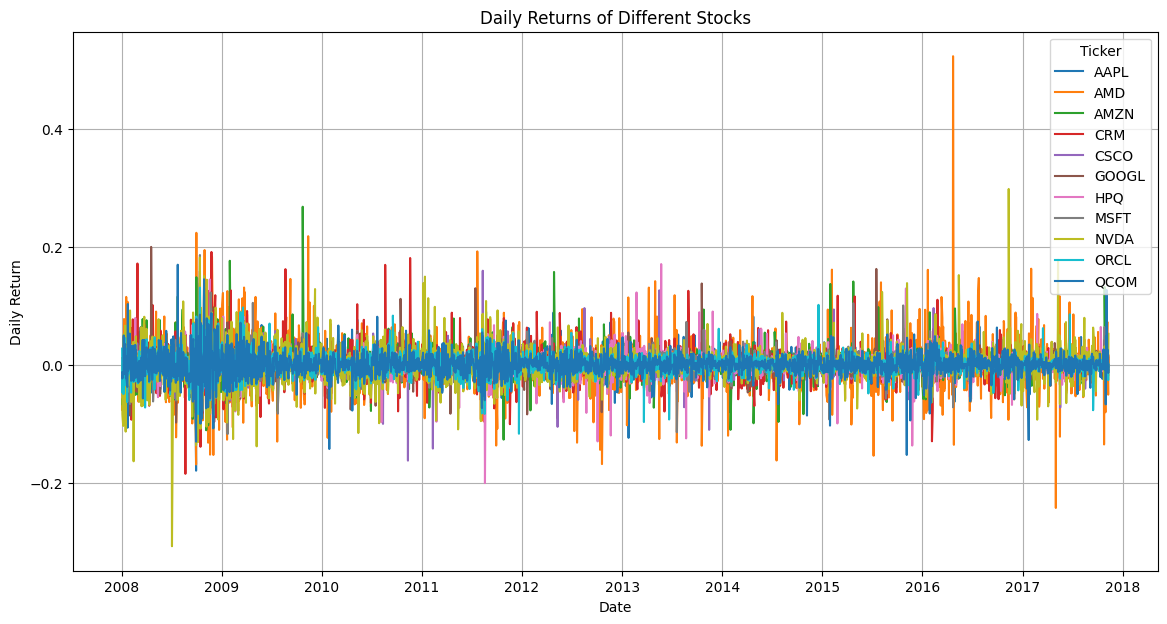

In [49]:
# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Daily Returns of Different Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

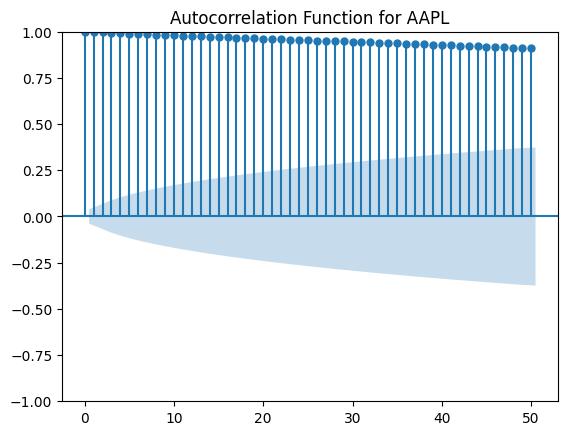

<Figure size 1200x600 with 0 Axes>

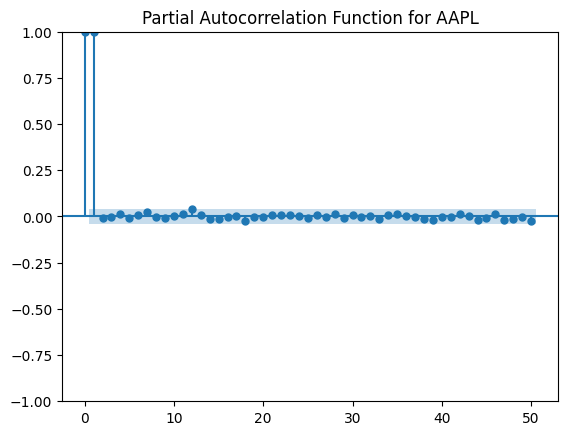

<Figure size 1200x600 with 0 Axes>

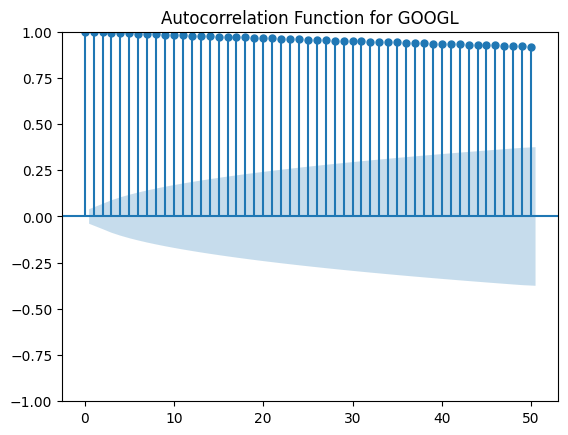

<Figure size 1200x600 with 0 Axes>

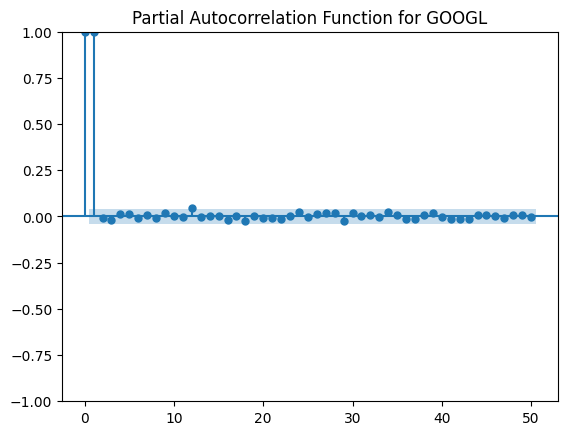

<Figure size 1200x600 with 0 Axes>

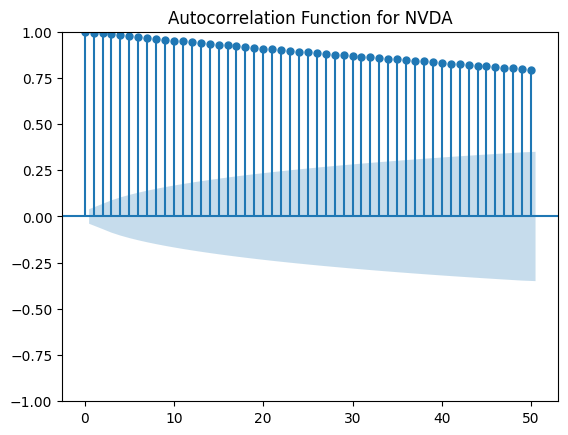

<Figure size 1200x600 with 0 Axes>

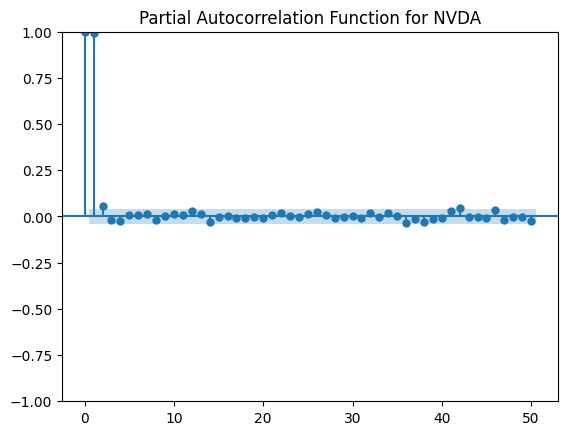

<Figure size 1200x600 with 0 Axes>

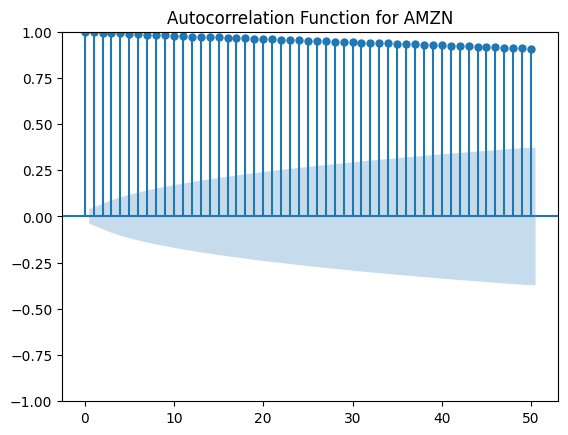

<Figure size 1200x600 with 0 Axes>

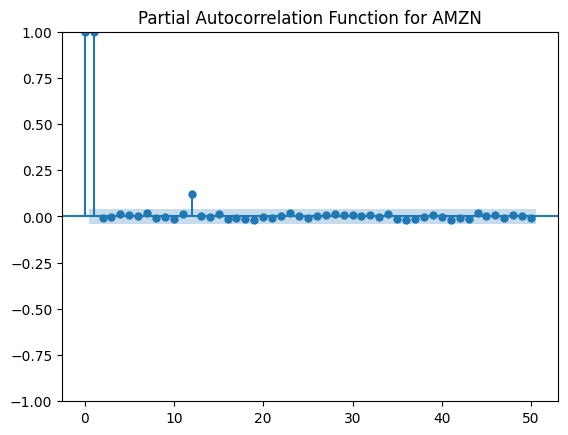

<Figure size 1200x600 with 0 Axes>

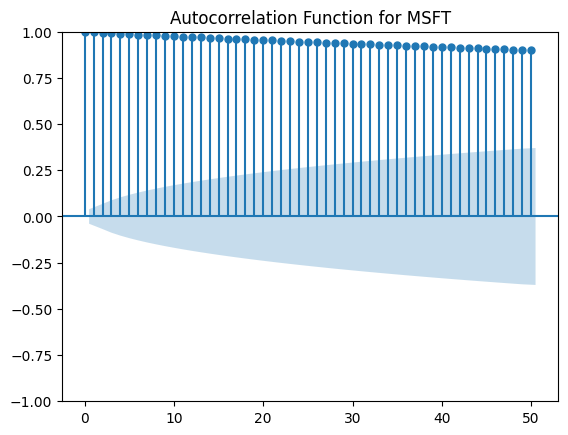

<Figure size 1200x600 with 0 Axes>

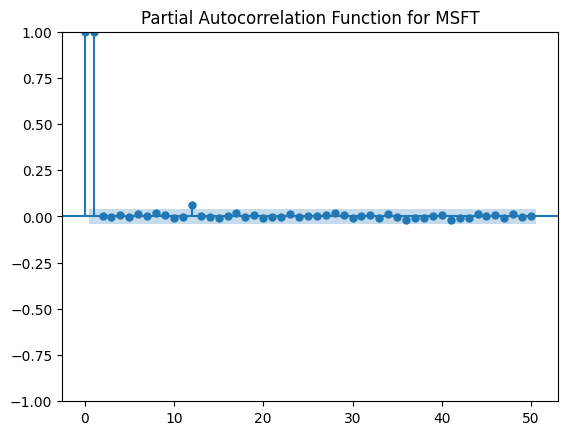

<Figure size 1200x600 with 0 Axes>

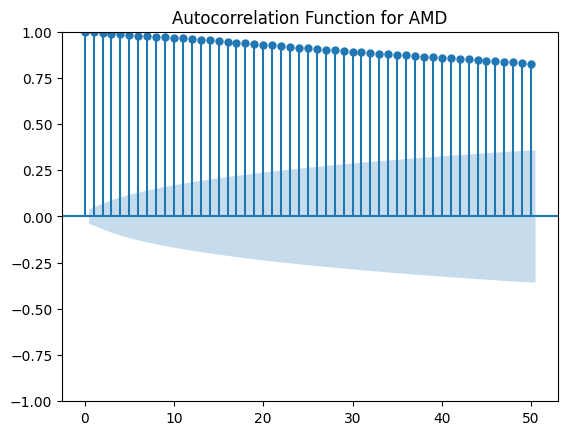

<Figure size 1200x600 with 0 Axes>

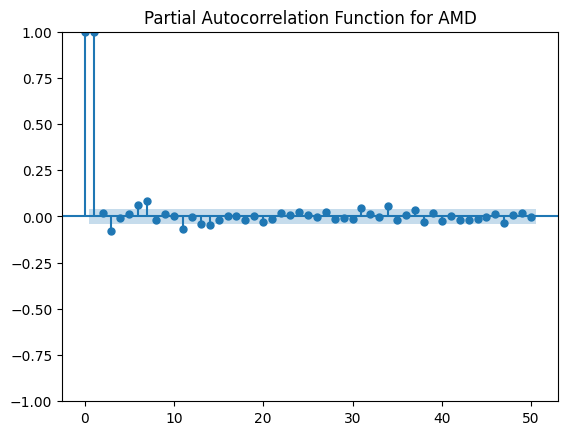

<Figure size 1200x600 with 0 Axes>

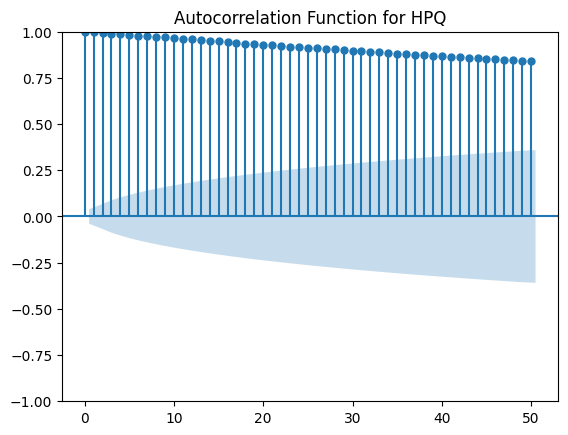

<Figure size 1200x600 with 0 Axes>

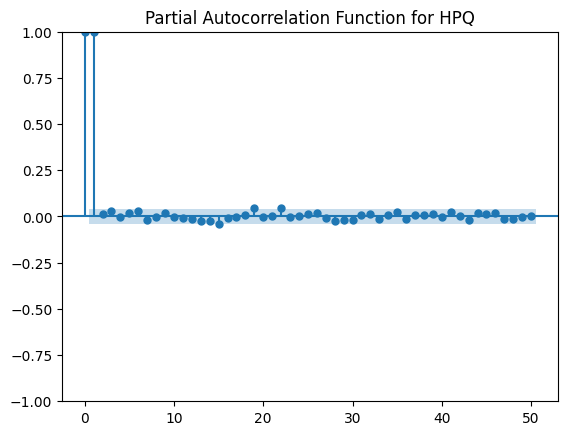

<Figure size 1200x600 with 0 Axes>

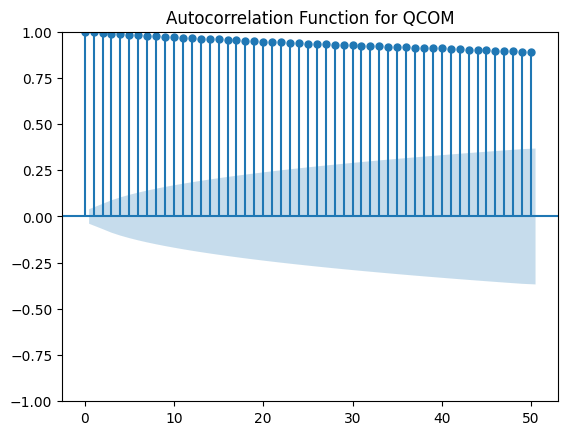

<Figure size 1200x600 with 0 Axes>

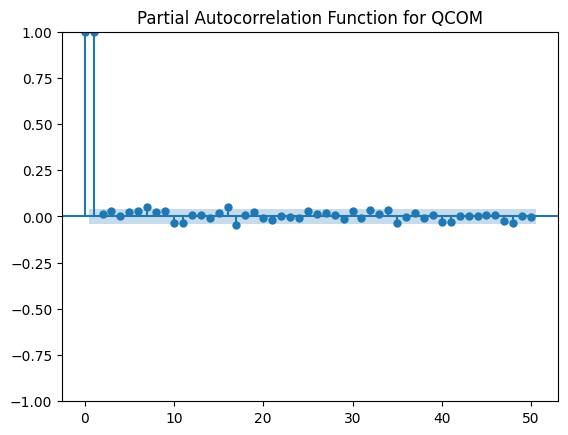

<Figure size 1200x600 with 0 Axes>

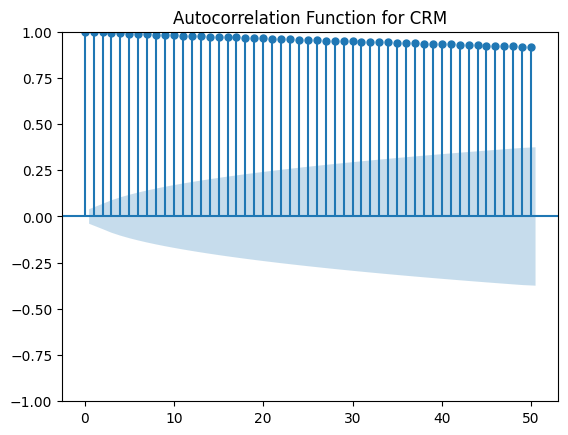

<Figure size 1200x600 with 0 Axes>

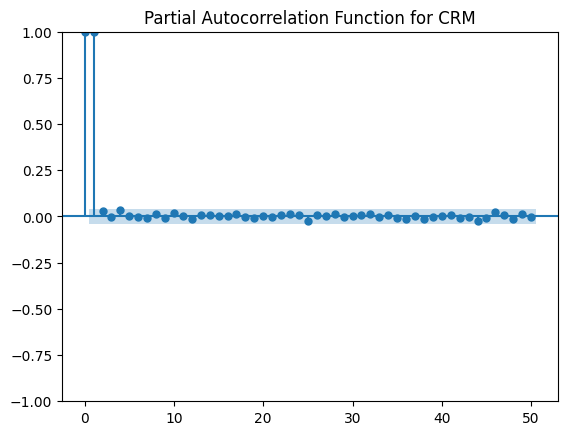

<Figure size 1200x600 with 0 Axes>

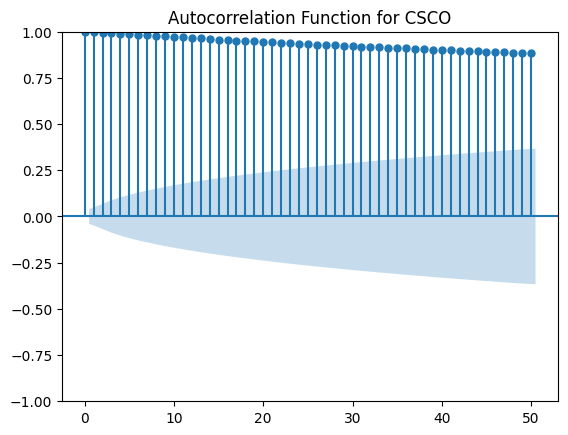

<Figure size 1200x600 with 0 Axes>

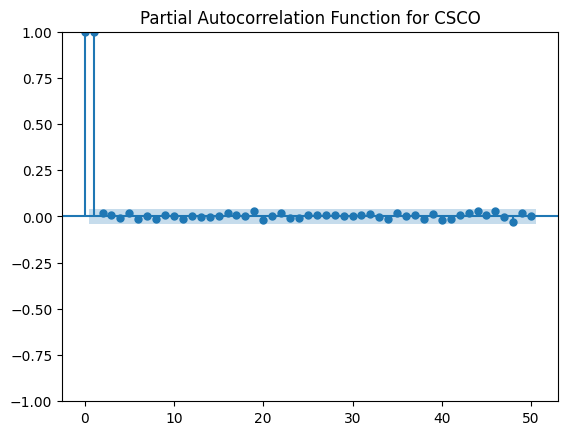

<Figure size 1200x600 with 0 Axes>

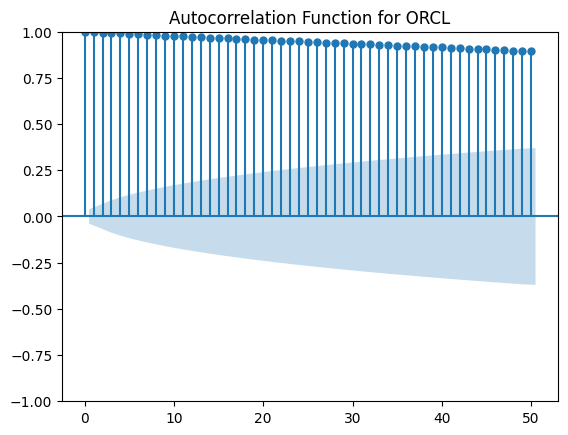

<Figure size 1200x600 with 0 Axes>

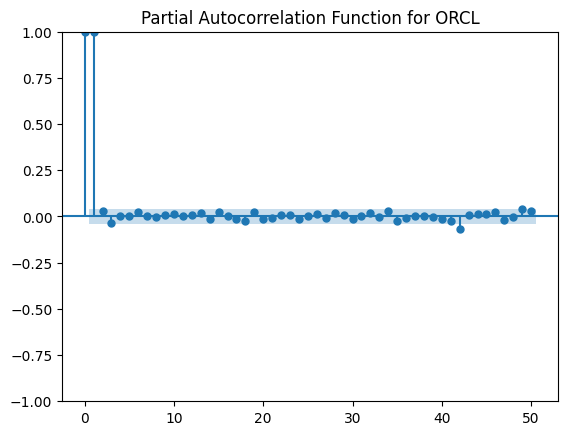

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'Date' to datetime if it's your DataFrame index or a column
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
df.set_index('Date', inplace=True)

# List of unique tickers
tickers = selected_data['Ticker'].unique()

# Loop through each ticker and plot ACF and PACF
for ticker in tickers:
    data = selected_data[selected_data['Ticker'] == ticker]['Close']

    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(data, lags=50, title=f'Autocorrelation Function for {ticker}')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(data, lags=50, title=f'Partial Autocorrelation Function for {ticker}')
    plt.show()



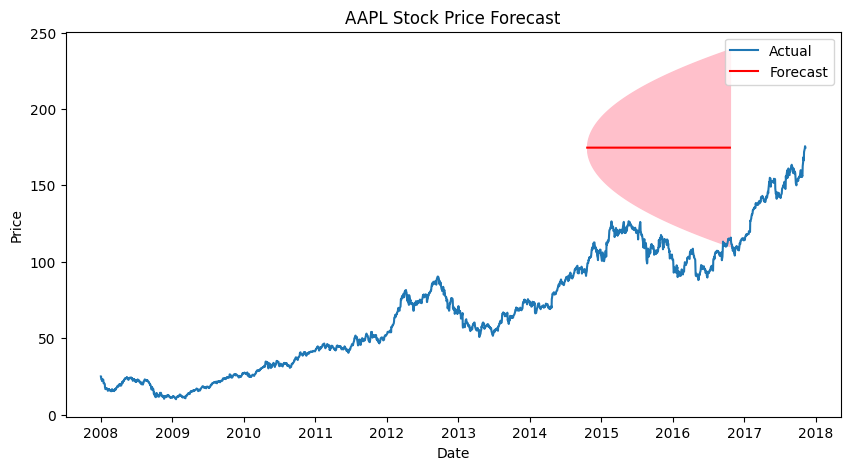

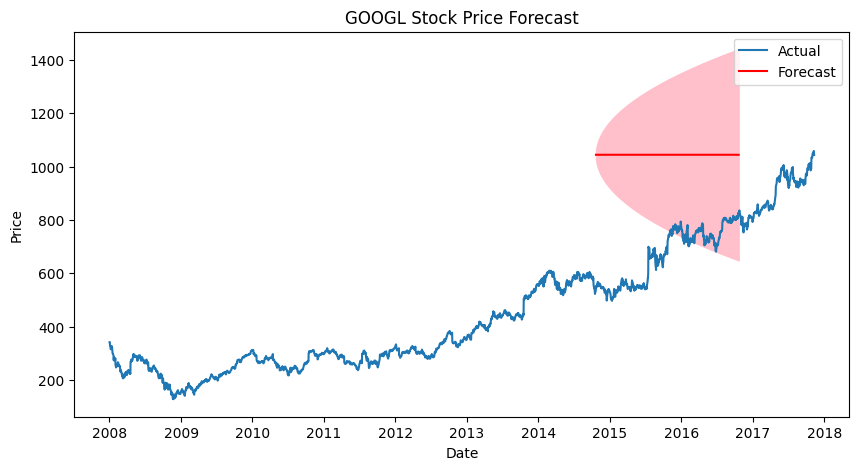

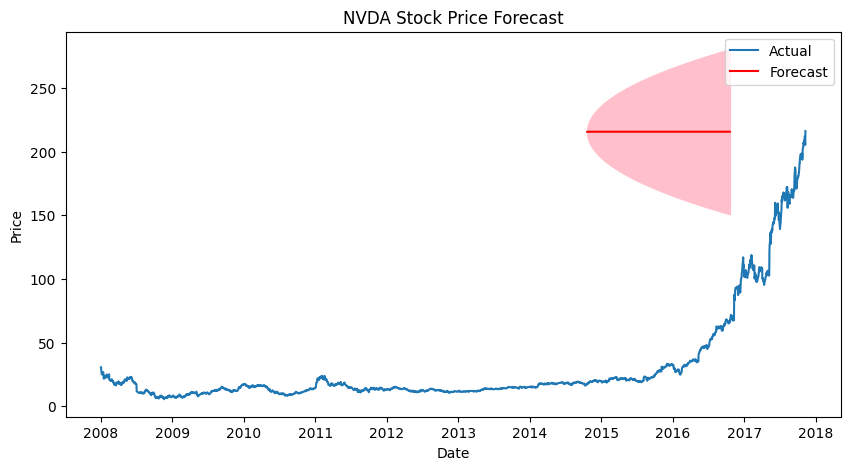

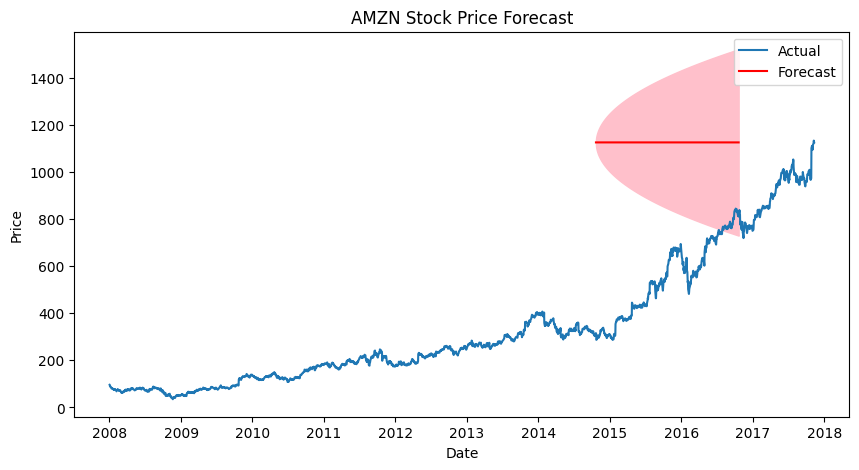

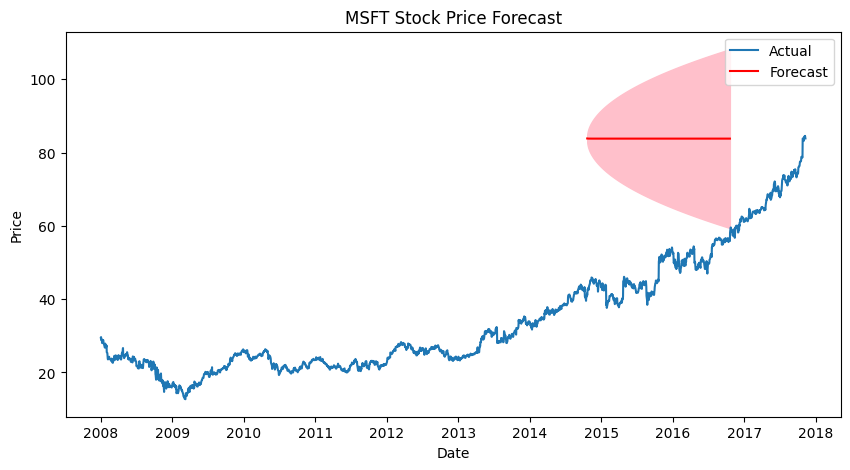

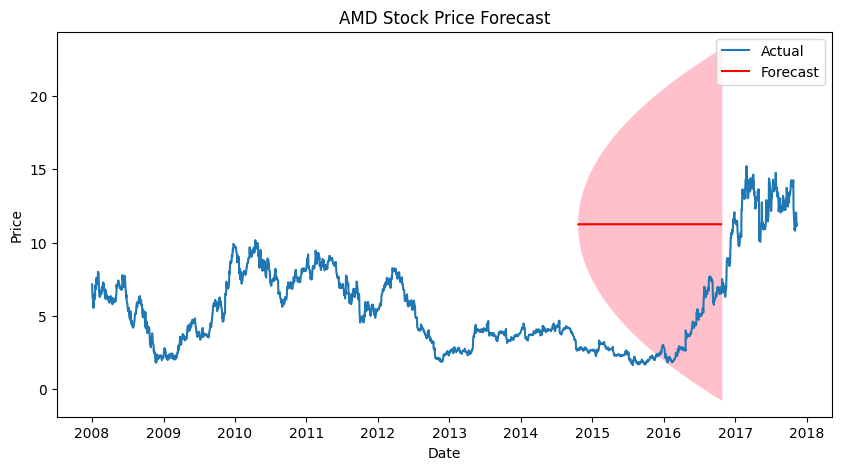

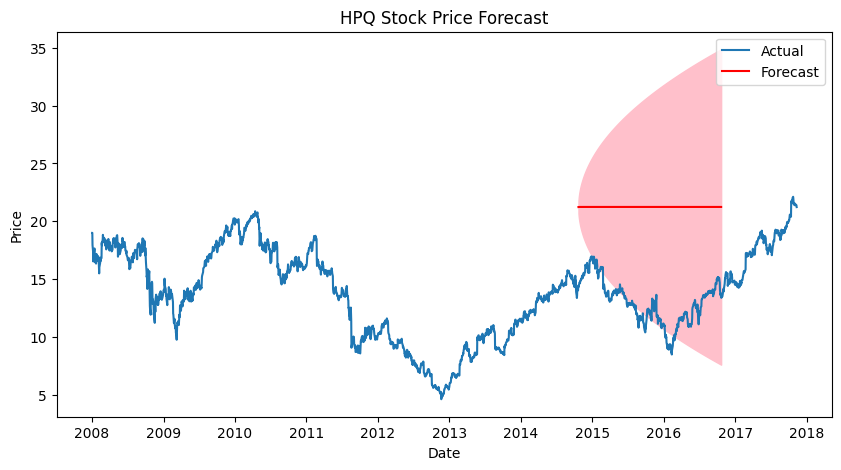

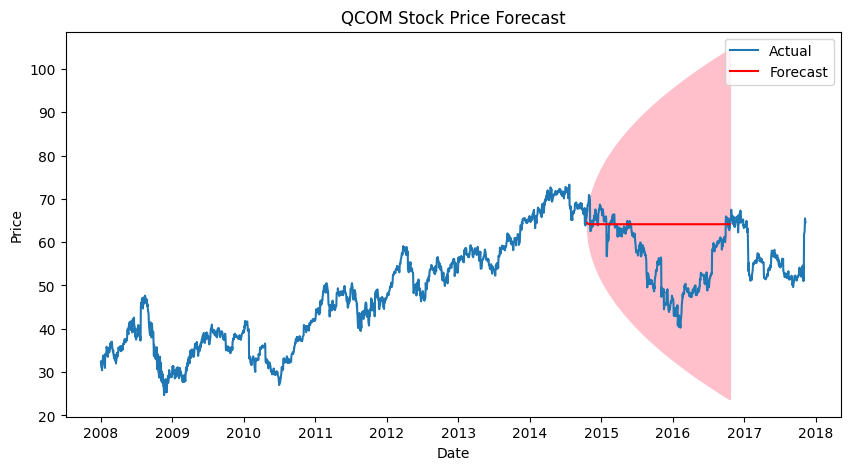

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


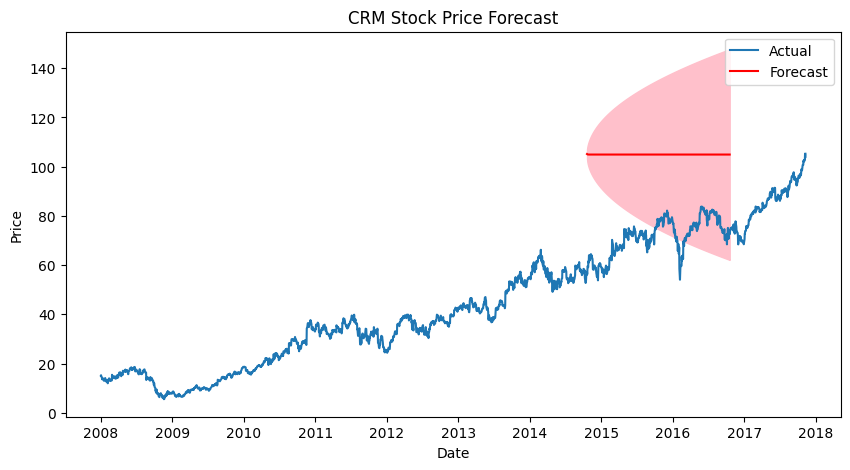

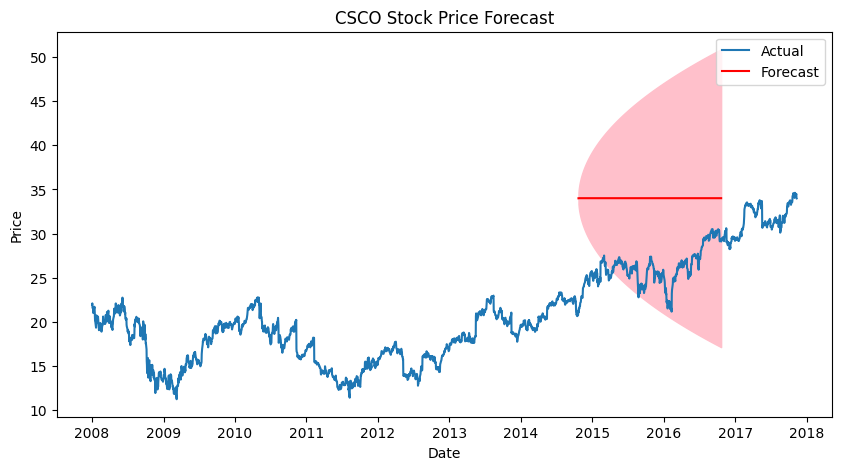

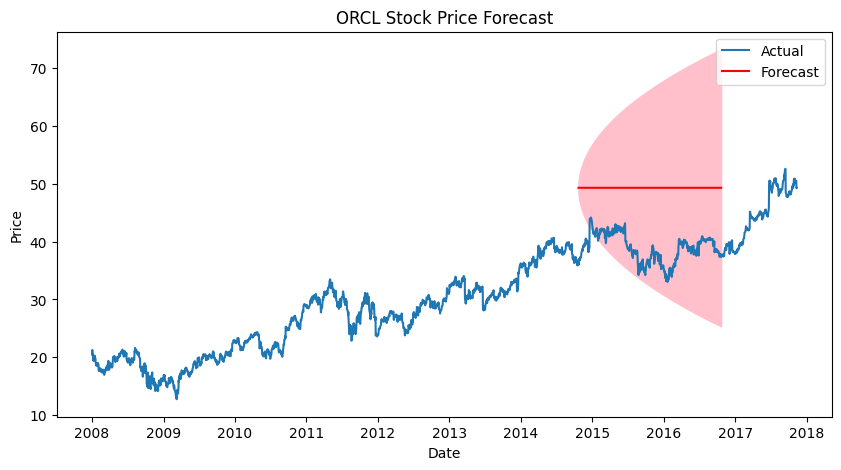

In [35]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'selected_data' is already loaded and processed from your earlier code.

# Convert 'Date' to datetime type and set it as the DataFrame index
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data.index = pd.DatetimeIndex(selected_data.index).to_period('D')  # Assuming daily data

# List of tickers
tickers = ['aapl', 'googl', 'nvda', 'amzn', 'msft', 'amd', 'hpq', 'qcom', 'crm', 'csco', 'orcl']

# Iterate through each ticker
for ticker in tickers:
    selected_data_ticker = selected_data[selected_data['Ticker'].str.lower() == ticker.lower()]
    closing_prices = selected_data_ticker['Close']

    # Fit an ARIMA model (potentially adjust p, d, q based on data characteristics)
    model = ARIMA(closing_prices, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting
    forecast = model_fit.get_forecast(steps=365*2)  # 2 years
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Convert PeriodIndex to DateTimeIndex for plotting
    closing_prices.index = closing_prices.index.to_timestamp()
    mean_forecast.index = mean_forecast.index.to_timestamp()

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(closing_prices.index, closing_prices, label='Actual')
    plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')
    plt.fill_between(mean_forecast.index,
                     confidence_intervals['lower Close'],
                     confidence_intervals['upper Close'], color='pink')
    plt.title(f'{ticker.upper()} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [19]:
print(closing_prices.tail())


Date
2017-11-06    50.40
2017-11-07    50.49
2017-11-08    50.54
2017-11-09    49.24
2017-11-10    49.32
Name: Close, dtype: float64


Target Stocks

Apple - AAPL

Google (Alphabet Inc.) - GOOGL (for Class A shares)

Nvidia - NVDA

Amazon - AMZN

Microsoft - MSFT

AMD (Advanced Micro Devices) - AMD

HP (HP Inc., not to be confused with Hewlett Packard Enterprise) - HPQ

QUALCOMM Incorporated - QCOM

Salesforce, Inc. - CRM

Cisco Systems, Inc. - CSCO

Oracle Corporation - ORCL

.

Common Tech ETF

Technology Select Sector SPDR ETF (XLK) Ranked the No. 1 technology ETF by U.S. News and earning five stars from Morningstar, the Technology Select Sector SPDR ETF is one to watch. It's returned 15% year to date and comes in with a low 0.09% expense ratio.